<a href="https://colab.research.google.com/github/ConstanzaGarciaOsses/predicciones-de-ventas-alimenticias/blob/main/03_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Primero, importamos la libreria pandas y cargamos el archivo # QUE HORRORRR EL EJERCICIOOO AJAJAJA SUPER LAAARGOOOOO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_sales = pd.read_csv("/content/sales_predictions.csv")

In [ ]:
# Observamos las primeras filas para ver si se cargo bien la data y como viene. 

In [ ]:
df_sales.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [ ]:
df_sales.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
df_sales.shape # Estamos trabajando sobre 12 columnas y 8.523 filas (son muchas). 

(8523, 12)

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# De aqui obtenemos mucha informacion. 
# 1) Tenemos missing values en Item_Weight y en Outlet_Size. Ademas, sabemos que la cantidad de missing values supera el 2% de la informacion de esa columna por lo que 
# no es recomendable eliminar ni la columna entera ni la fila. 
# 2) Tenemos tipos de datos como objeto, decimal (float) y entero (integer).  
# 3) Podemos intuir, dado el nombre de las columnas, cuales tendran pocos valores unicos y cuales tendran muchos valores unicos. 

In [ ]:
df_sales["Item_Fat_Content"].value_counts() # Probabilidad de tener pocos valores unicos. 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Aqui tenemos pocas categorias para la columna "Item_Fat_Content" pero podemos observar que las alternativas que hay se repiten entre si pero escritas de 
# diferente forma, por lo que hay que trabajar sobre esto para arreglarla. Por ejemplo: LF = Low Fat = low fat. A su vez, reg = Regular. Podemos 
# corroborar que solo deben haber dos categorias aqui, con el listado otorgado por el curso en la pagina web. 

In [ ]:
# Para arreglar el problema antes mencionados vamos a hacer lo siguiente: 

In [ ]:
df_sales["Item_Fat_Content"] = df_sales["Item_Fat_Content"].replace("LF", "Low Fat") # Con este codigo reemplazamos los que dicen LF con Low Fat

In [ ]:
df_sales["Item_Fat_Content"] = df_sales["Item_Fat_Content"].replace("low fat", "Low Fat") # Dado que Low Fat será el establecido, reemplazamos tambien el low fat.

In [ ]:
df_sales["Item_Fat_Content"] = df_sales["Item_Fat_Content"].replace("reg", "Regular") # Y este item de reg, lo reemplazamos con Regular

In [ ]:
df_sales["Item_Fat_Content"].value_counts() # Aqui, comprobamos que las categorian se hayan cambiado de la forma correcta. 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# En efecto, el cambio se hizo de manera exitosa. Tenemos solo dos valores para la columna Item Fat Content. Ahora vamos por otra columna. 

In [ ]:
df_sales["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# En este caso tenemos 16 categorias diferentes para el total de productos. Podemos ver que las categorias estan bien, ninguna se repite ni esta mal escrita. 
# La columna es de tipo entero (integer) lo cual hace sentido. No existe media fruta que se pueda vender o medio pescado, o medio bebestible. 

In [ ]:
# Ahora podemos ver algo interesante. Puede ser que exista una correlacion entre el Item_Type y el Item_Visibility y a su vez este ultimo puede tener correlacion 
# con el tamaño de la tienda (Outlet_Size), lo que a su vez puede depender de donde este ubicada la tienda (seguramente en lugares donde la poblacion es mayor
# la tienda será mas grande para albergar mayor cantidad de comida)

In [ ]:
# Fuera de todo lo anterior mencionado, trabajaremos sobre la columna Item_weight.

In [ ]:
df_sales["Item_Weight"].isnull().sum() 

1463

In [ ]:
# En la columna Item_Weight, tal como dijimos antes, tenemos missing values. Un total de 1463 para ser exactos. 

In [ ]:
df_sales["Outlet_Size"].isnull().sum()

2410

In [ ]:
# Al igual que en el caso anterior, en la columna Outlet_Size, hay un total de 2410 missing values. 

In [ ]:
# Ahora si, podemos comenzar a ver las preguntas de la página. 

In [ ]:
# PREGUNTA 1: ¿Cuantas filas y columnas hay? 

In [ ]:
df_sales.shape

(8523, 12)

In [ ]:
# Con el codigo shape, podemos ver que estamos trabajando con 12 columnas y 8523 filas. 

In [ ]:
# PREGUNTA 2: ¿Cuales son los tipos de datos de cada variable? 

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Con el comando info() podemos ver el tipo de dato por cada variable. Tenemos tres tipos de datos, objeto, float (decimal) e integer (entero).

In [ ]:
# PREGUNTA 3: ¿HAY DUPLICADOS? Si es el caso, elimine algunos duplicados. 

In [ ]:
df_sales.duplicated().sum() # Vemos que no hay filas duplicadas. 

0

In [ ]:
df_sales.info() # Con este codigo, podemos ver si hay alguna columna duplicada (por nombres que signifiquen lo mismo pero esten mal escritos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Vemos que no hay columnas duplicadas.

In [ ]:
# PREGUNTA 4: Identifiquen los valores faltantes.

In [ ]:
df_sales.isna().sum() # Con esto, obtenemos los mismos missing values que los mencionados anteriormente. 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Tenemos 1463 valores faltantes para Item_Weight y 2410 missing values para Outlet_Size

In [ ]:
# PREGUNTA 5: Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:
# Para ir viendo los valores faltantes debemos ver alguna relacion que pueda tener con las demas columnas. 

In [ ]:
from pickle import TRUE 
df_sales.loc[(df_sales['Item_Weight'].isna() == True)].head(8) # Lo que se podría ver es el Item_Identifier. 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950


In [ ]:
df_sales['Item_Identifier'].value_counts().sort_values(ascending = False) # Tenemos esos cinco primeros codigos de Item_Identifier que se repiten. 

FDW13    10
FDG33    10
NCL31     9
DRN47     9
FDO19     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
# La logica de esto es que yo estoy buscando el peso de un producto. Pero ese producto (item identifier) se supone que esta mas de una vez en el local (dado los resultados
# de arriba). Es por esto que, teoría, debieran tener el mismo pero todos los productos con Item_Identifier = FDW13. Veamos. 

In [ ]:
df_sales.loc[(df_sales['Item_Identifier'] == "FDW13")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,NaN,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,Low Fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,NaN,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [ ]:
# Con lo de arriba podemos probar que tengo razon. Ahora bien, todos los productos con un Item_Identifier = FDW13 tienen un peso de 8.5. Veamos los demas. 

In [ ]:
df_sales.loc[(df_sales['Item_Identifier'] == "FDG33")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
231,FDG33,NaN,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932
1575,FDG33,NaN,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
2728,FDG33,5.365,Regular,0.234733,Seafood,173.4764,OUT010,1998,NaN,Tier 3,Grocery Store,171.7764
4747,FDG33,5.365,Regular,0.140458,Seafood,169.7764,OUT049,1999,Medium,Tier 1,Supermarket Type1,3263.7516
5164,FDG33,5.365,Regular,0.140240,Seafood,171.0764,OUT046,1997,Small,Tier 1,Supermarket Type1,3263.7516
6112,FDG33,5.365,Regular,0.141034,Seafood,173.6764,OUT017,2007,NaN,Tier 2,Supermarket Type1,858.8820
7011,FDG33,5.365,Regular,0.140812,Seafood,173.5764,OUT018,2009,Medium,Tier 3,Supermarket Type2,2061.3168
7098,FDG33,5.365,Regular,0.140124,Seafood,172.0764,OUT013,1987,High,Tier 3,Supermarket Type1,2748.4224
7726,FDG33,5.365,Regular,0.140214,Seafood,173.7764,OUT035,2004,Small,Tier 2,Supermarket Type1,4637.9628


In [ ]:
df_sales.loc[(df_sales['Item_Identifier'] == "FDB34")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
385,FDB34,15.25,Low Fat,0.026605,Snack Foods,86.2198,OUT035,2004,Small,Tier 2,Supermarket Type1,610.5386
950,FDB34,15.25,Low Fat,0.026718,Snack Foods,85.2198,OUT018,2009,Medium,Tier 3,Supermarket Type2,1482.7366
1144,FDB34,15.25,Low Fat,0.044539,Snack Foods,85.3198,OUT010,1998,NaN,Tier 3,Grocery Store,261.6594
2629,FDB34,15.25,Low Fat,0.026651,Snack Foods,86.6198,OUT049,1999,Medium,Tier 1,Supermarket Type1,1657.1762
3569,FDB34,15.25,Low Fat,0.026760,Snack Foods,86.0198,OUT017,2007,NaN,Tier 2,Supermarket Type1,2006.0554
7915,FDB34,15.25,Low Fat,0.026664,Snack Foods,87.0198,OUT045,2002,NaN,Tier 2,Supermarket Type1,2442.1544


In [ ]:
# Pero esto es muy lento si queremos ir haciendolo por cada codigo. Debemos idear una forma para que todos los pesos que tengan el mismo Item_Identifier, tengan el mismo
# peso. Para eso, utilizaremos lo siguiente. 

In [ ]:
ID = df_sales['Item_Identifier'].value_counts() > 1 # Quiero ver solo los Item_Identifier que se repitan mas de una vez 

In [ ]:
ID.value_counts() # Esto nos dice que son 1550 los que se repiten mas de una vez y 9 los valores unicos de Item_Identifier. Verifiquemos: 

True     1550
False       9
Name: Item_Identifier, dtype: int64

In [ ]:
ID_false = ID[ID == False]

In [ ]:
ID_false # Efectivamente, ninguno de estos codigos se repiten por lo que tenemos 9 datos unicos y 1550 datos que se repiten. 

FDK57    False
FDN52    False
FDT35    False
FDE52    False
FDY43    False
FDQ60    False
FDO33    False
DRF48    False
FDC23    False
Name: Item_Identifier, dtype: bool

In [ ]:
# Ahora, lo que haremos será que, con ayuda de ChatGPT vamos a crear una funcion que me ayude, de manera automatica, a cambiar los datos de "Item_Weight". 

In [ ]:
df_sales['Item_Weight'] = df_sales.groupby('Item_Identifier')['Item_Weight'].transform('first')

In [ ]:
# A modo de explicacion, lo que hizo el codigo de arriba fue agrupar por Item Identifier iguales y con el .transform('first') le dijimos que copiara el primer 
# dato no nulo de la columna Item_Weight y lo pegara al resto de los datos que pertenezcan al mismo grupo de Item_Identifier. 

In [ ]:
# Ahora, probaremos que el cambio se realizo de la manera correcta

In [ ]:
df_sales.loc[(df_sales['Item_Weight'].isna() == True)].head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
# Al parecer, faltaron solo esos datos que, al no contener ningun otro item que nos diera un peso para saber cuanto pesaban los missing values, tendremos que 
# tratarlos de otra forma. Pero, resultó con el resto de 1546 datos. 

In [ ]:
df_sales.isna().sum() # Claro, resulto con el resto de 1546 datos. 

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sales.loc[(df_sales['Item_Fat_Content'] == "Regular")].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,3003.000000,3006.000000,3006.000000,3006.000000,3006.000000
mean,12.706690,0.069439,141.504259,1997.867598,2224.561170
std,4.629896,0.052212,62.214786,8.363483,1721.480865
min,4.555000,0.000000,32.055800,1985.000000,33.955800
25%,8.760000,0.029650,92.221200,1987.000000,857.550400
50%,12.500000,0.058877,144.044400,1999.000000,1844.598900
75%,16.700000,0.100394,186.521400,2004.000000,3198.669650
max,21.200000,0.311090,266.888400,2009.000000,12117.560000


In [ ]:
# Con lo de arriba obtengo que el peso promedio de los Item Fat Content que son regular es de 12.70. Por lo que, reemplazaré el NaN por ese promedio, 
# pero en los tres datos que nos faltan. El ultimo es low fat. 

In [ ]:
df_sales.loc[(df_sales['Item_Fat_Content'] == "Low Fat")].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5516.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,12.967280,0.064330,140.714098,1997.812398,2157.711534
std,4.652743,0.051175,62.311756,8.376960,1697.973824
min,4.590000,0.000000,31.290000,1985.000000,33.290000
25%,8.837500,0.026322,94.477800,1987.000000,826.257800
50%,12.800000,0.051147,142.081200,1999.000000,1765.035800
75%,17.250000,0.092576,185.089800,2004.000000,3050.695600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# El promedio de peso de los low fat es de 12.96. Ahora haremos los reemplazos.  

In [ ]:
df_sales.loc[df_sales['Item_Fat_Content'] == "Low Fat", "Item_Weight"] = df_sales.loc[df_sales['Item_Fat_Content'] == "Low Fat", "Item_Weight"].fillna(12.96)
df_sales.loc[df_sales['Item_Fat_Content'] == "Regular", "Item_Weight"] = df_sales.loc[df_sales['Item_Fat_Content'] == "Regular", "Item_Weight"].fillna(12.70)

In [ ]:
df_sales.isna().sum() # Comprobamos el haber solucionado los NaN de la columna Item_weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sales.loc[(df_sales['Item_Weight'].isna() == True)].head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# Lo de arriba fue otra forma de comprobar que ya no existen valores NaN en la columna Item_Weight

In [ ]:
df_sales["Item_Weight"].head(15) # Todo ok. 

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7     19.000
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
Name: Item_Weight, dtype: float64

In [ ]:
df_sales.loc[(df_sales['Item_Identifier'] == "FDW13")] # Todo ok. 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,8.5,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,Low Fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,8.5,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [ ]:
# Ahora solo queda trabajar con la columna Outlet_Size. # Primero, vamos a ver si estos valores faltantes de Outlet_Size tienen alguna relacion con alguna otra columna. 

In [ ]:
df_sales.loc[(df_sales['Outlet_Size'].isna() == False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_sales["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df_sales.loc[(df_sales['Outlet_Size'].isna() == False) & (df_sales["Outlet_Identifier"] == "OUT027")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,20.200,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,6.385,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,12.850,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [ ]:
# Con lo anterior podemos ver que todos los Outlet_Identifier OUT027 son de Outlet_Size = Medium, pero no tienen ningun dato NaN en outlet size, asi que 
# como son solo 10 grupos, vamos a ir probando. 

In [ ]:
df_sales.loc[(df_sales['Outlet_Size'].isna() == True) & (df_sales["Outlet_Identifier"] == "OUT045")] # Aqui hay algo. 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
df_sales.loc[(df_sales['Outlet_Size'].isna() == True) & (df_sales["Outlet_Identifier"] == "OUT017")] # Aqui hay mas 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256
...,...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,7.420,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,NaN,Tier 2,Supermarket Type1,4727.1800
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,NaN,Tier 2,Supermarket Type1,3715.1640
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170


In [ ]:
df_sales.loc[(df_sales['Outlet_Size'].isna() == True) & (df_sales["Outlet_Identifier"] == "OUT010")] # Mas

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [ ]:
# Con lo anterior podemos darnos cuenta que solo hay tres grupos de outlet_Identifier que tienen valores NaN en sus Outlet Size. Veremos si podemos extraer informacion 
# de lo que debieran ser los NaN de acuerdo al año de construccion del establecimiento: 

In [ ]:
df_sales.loc[(df_sales['Outlet_Establishment_Year'] == 1998) & (df_sales['Outlet_Size'].isna() == False)] # No se puede, veamos otra forma. 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# Tal vez si lo relacionamos con el Outlet_type, podamos encontrar algo: 

In [ ]:
df_sales.loc[(df_sales['Outlet_Type'] == "Grocery Store") & (df_sales['Outlet_Size'].isna() == False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,10.195,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,5.940,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,13.500,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,7.365,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,9.500,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [ ]:
# Aqui encontramos algo. Al parecer todas las outlet type = Grocery Store, tienen como outlet identifier OUT19 y OUT10 son de OutletSize Small.
# Haremos al tiro el cambio. 

In [ ]:
df_sales.loc[df_sales['Outlet_Type'] == "Grocery Store", "Outlet_Size"] = df_sales.loc[df_sales['Outlet_Type'] == "Grocery Store", "Outlet_Size"].fillna("Small")

In [ ]:
df_sales.loc[(df_sales['Outlet_Type'] == "Grocery Store") & (df_sales['Outlet_Size'].isna() == True)] # Verificamos que el cambio se haya hecho bien.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# Todo ok con ese punto, ahora veamos cuantas nos falta con los otros Outlet_Size. 

In [ ]:
df_sales.isna().sum() # Nos faltan 1855 datos. 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sales.loc[(df_sales['Outlet_Location_Type'] == "Tier 2")] # Aqui encontramos algo 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850


In [ ]:
# Al parecer, todos los Outlet_Location_type de Tier2 son de outlet_size Small. 

In [ ]:
df_sales.loc[(df_sales['Outlet_Location_Type'] == "Tier 2") & (df_sales['Outlet_Size'].isna() == False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
66,FDH19,19.350,Low Fat,0.033082,Meat,172.5738,OUT035,2004,Small,Tier 2,Supermarket Type1,4865.6664
86,FDZ55,6.055,Low Fat,0.025404,Fruits and Vegetables,160.9920,OUT035,2004,Small,Tier 2,Supermarket Type1,2716.4640
...,...,...,...,...,...,...,...,...,...,...,...,...
8503,FDQ44,20.500,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252


In [ ]:
# Efectivamente, queda comprobado. Ahora haremos el cambio: 

In [ ]:
df_sales.loc[df_sales['Outlet_Location_Type'] == "Tier 2", "Outlet_Size"] = df_sales.loc[df_sales['Outlet_Location_Type'] == "Tier 2", "Outlet_Size"].fillna("Small")

In [ ]:
# Ahora comprobamos que se haya hecho bien: 

In [ ]:
df_sales.loc[(df_sales['Outlet_Location_Type'] == "Tier 2") & (df_sales['Outlet_Size'].isna() == True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# Terminamos con este paso. 

In [ ]:
# PREGUNTA 6: Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
# Verificamos que no quede ningun NaN en ninguna columna: 

In [ ]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Todo ok. No hay missing values. 

In [ ]:
# PREGUNTA 7: Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
# Esto lo hicimos mas arriba, cuando arreglamos la columna Item_Fat_Content y le arreglamos las categorias que tenia duplicadas. 

In [ ]:
# PREGUNTA 8: Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df_sales["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
# ------------- ******** PARTE 4: GRAFICANDO ******** ------------- # 

In [ ]:
# Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_sales["Item_Weight"].value_counts()

12.150    105
17.600    102
11.800     90
13.650     89
15.100     86
         ... 
5.675       2
8.800       2
6.405       2
5.210       2
12.960      1
Name: Item_Weight, Length: 417, dtype: int64

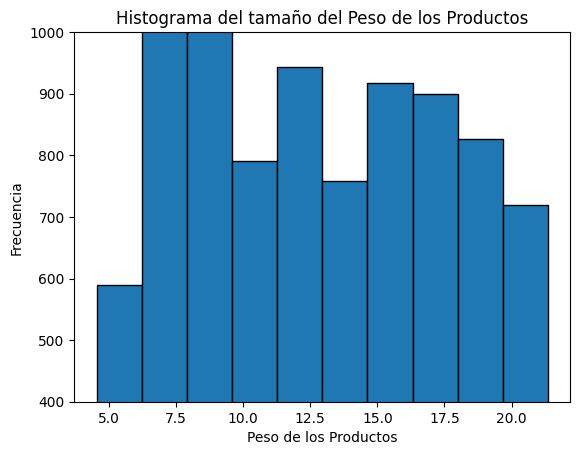

In [ ]:
plt.hist(df_sales["Item_Weight"], edgecolor='black')
plt.ylim(400, 1000)
plt.xlabel("Peso de los Productos")
plt.ylabel("Frecuencia")
plt.title("Histograma del tamaño del Peso de los Productos")
plt.show()

In [ ]:
# Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

In [ ]:
df_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


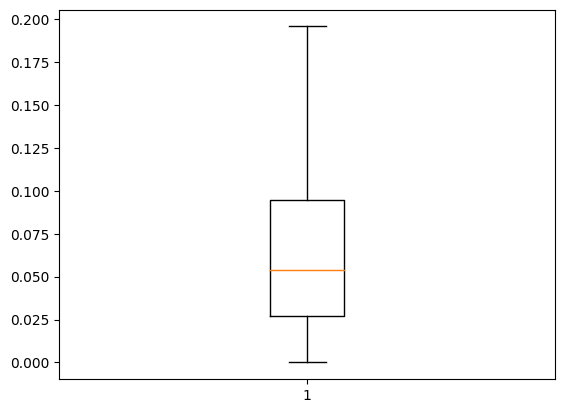

In [ ]:
plt.boxplot(df_sales["Item_Visibility"], showfliers=False); # Aqui creamos un boxplot con los datos de Item_Visibility. 

In [ ]:
# Entendemos por el que, la linea roja es la media de los datos, la cual corresponde a un aproximado de 0.5 (lo podemos verificar con .mean en la columna).

In [ ]:
# Mapa de calor de la correlación entre las características.

In [ ]:
# Vamos a hacer una correlacion con todas las columnas del dataframe 

<ipython-input-120-5b652e1ef122>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sales.corr()


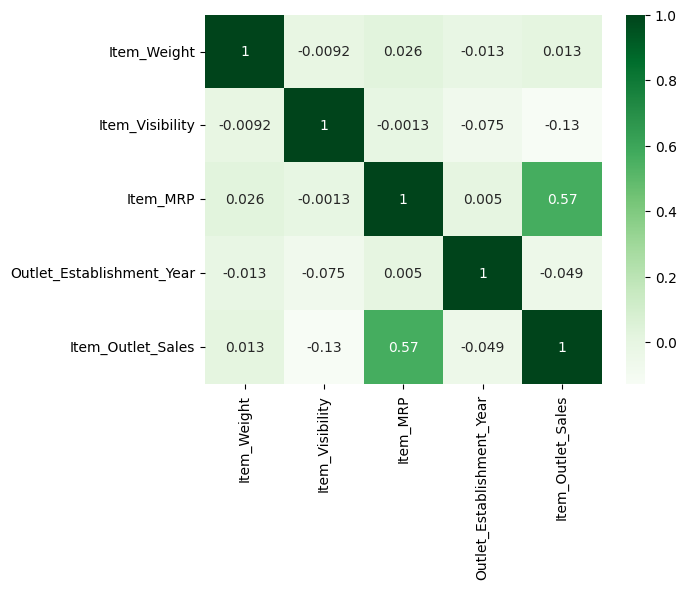

In [ ]:
corr = df_sales.corr()
sns.heatmap(corr, cmap='Greens', annot=True)
plt.show()

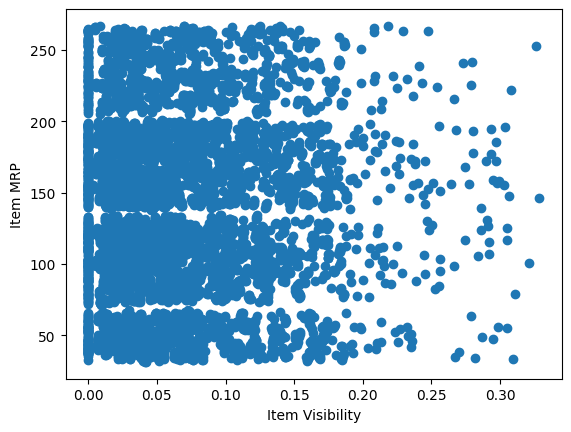

In [ ]:
plt.scatter(df_sales["Item_Visibility"], df_sales["Item_MRP"])
plt.xlabel("Item Visibility")
plt.ylabel("Item MRP")
plt.show()

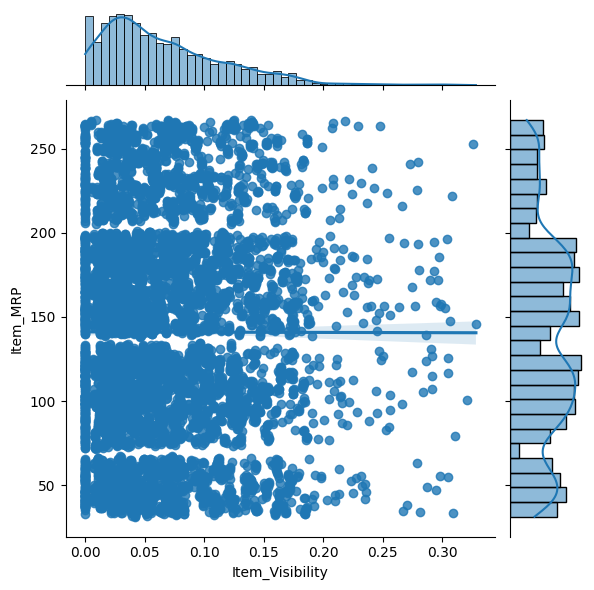

In [ ]:
sns.jointplot(x="Item_Visibility", y="Item_MRP", data=df_sales, kind="reg")
plt.show()

In [ ]:
# ============= AHORA ESTAMOS EN LA PARTE DE MACHINE LEARNING ======================= #  

In [ ]:
# Importar las librerias necesarias

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Identifiquen el objetivo (X) y las características (y): Asignen la columna. Realicen un train test split 

In [ ]:
X = df_sales.drop('Item_Outlet_Sales', axis=1)
y = df_sales['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Primer pipeline, será el numerico
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Segundo pipeline, será el categorico. 
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55148166a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5512832dc0>)])